In [174]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

white = pd.read_csv("./winequality-white.csv", sep =';')
red = pd.read_csv("./winequality-red.csv",  sep =';')
white['type'] = 0
red['type'] = 1
white.head()
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [175]:
white.info()
print()
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598


In [176]:
#Provided DataSet
wine = white.append(red, ignore_index = True)
wine.isnull().sum().sort_values(ascending=True)

In [177]:
#After fixing Dataset Values
missing_val_cols = ["fixed acidity", "pH", "volatile acidity", "sulphates", "citric acid", "residual sugar", "chlorides"]
for col in missing_val_cols:
    mean = wine[col].mean()
    wine[col].fillna(mean, inplace=True)
wine.isnull().sum()

In [178]:
#Data Exploration
wine['type'].value_counts()

print()
wine['quality'].value_counts()

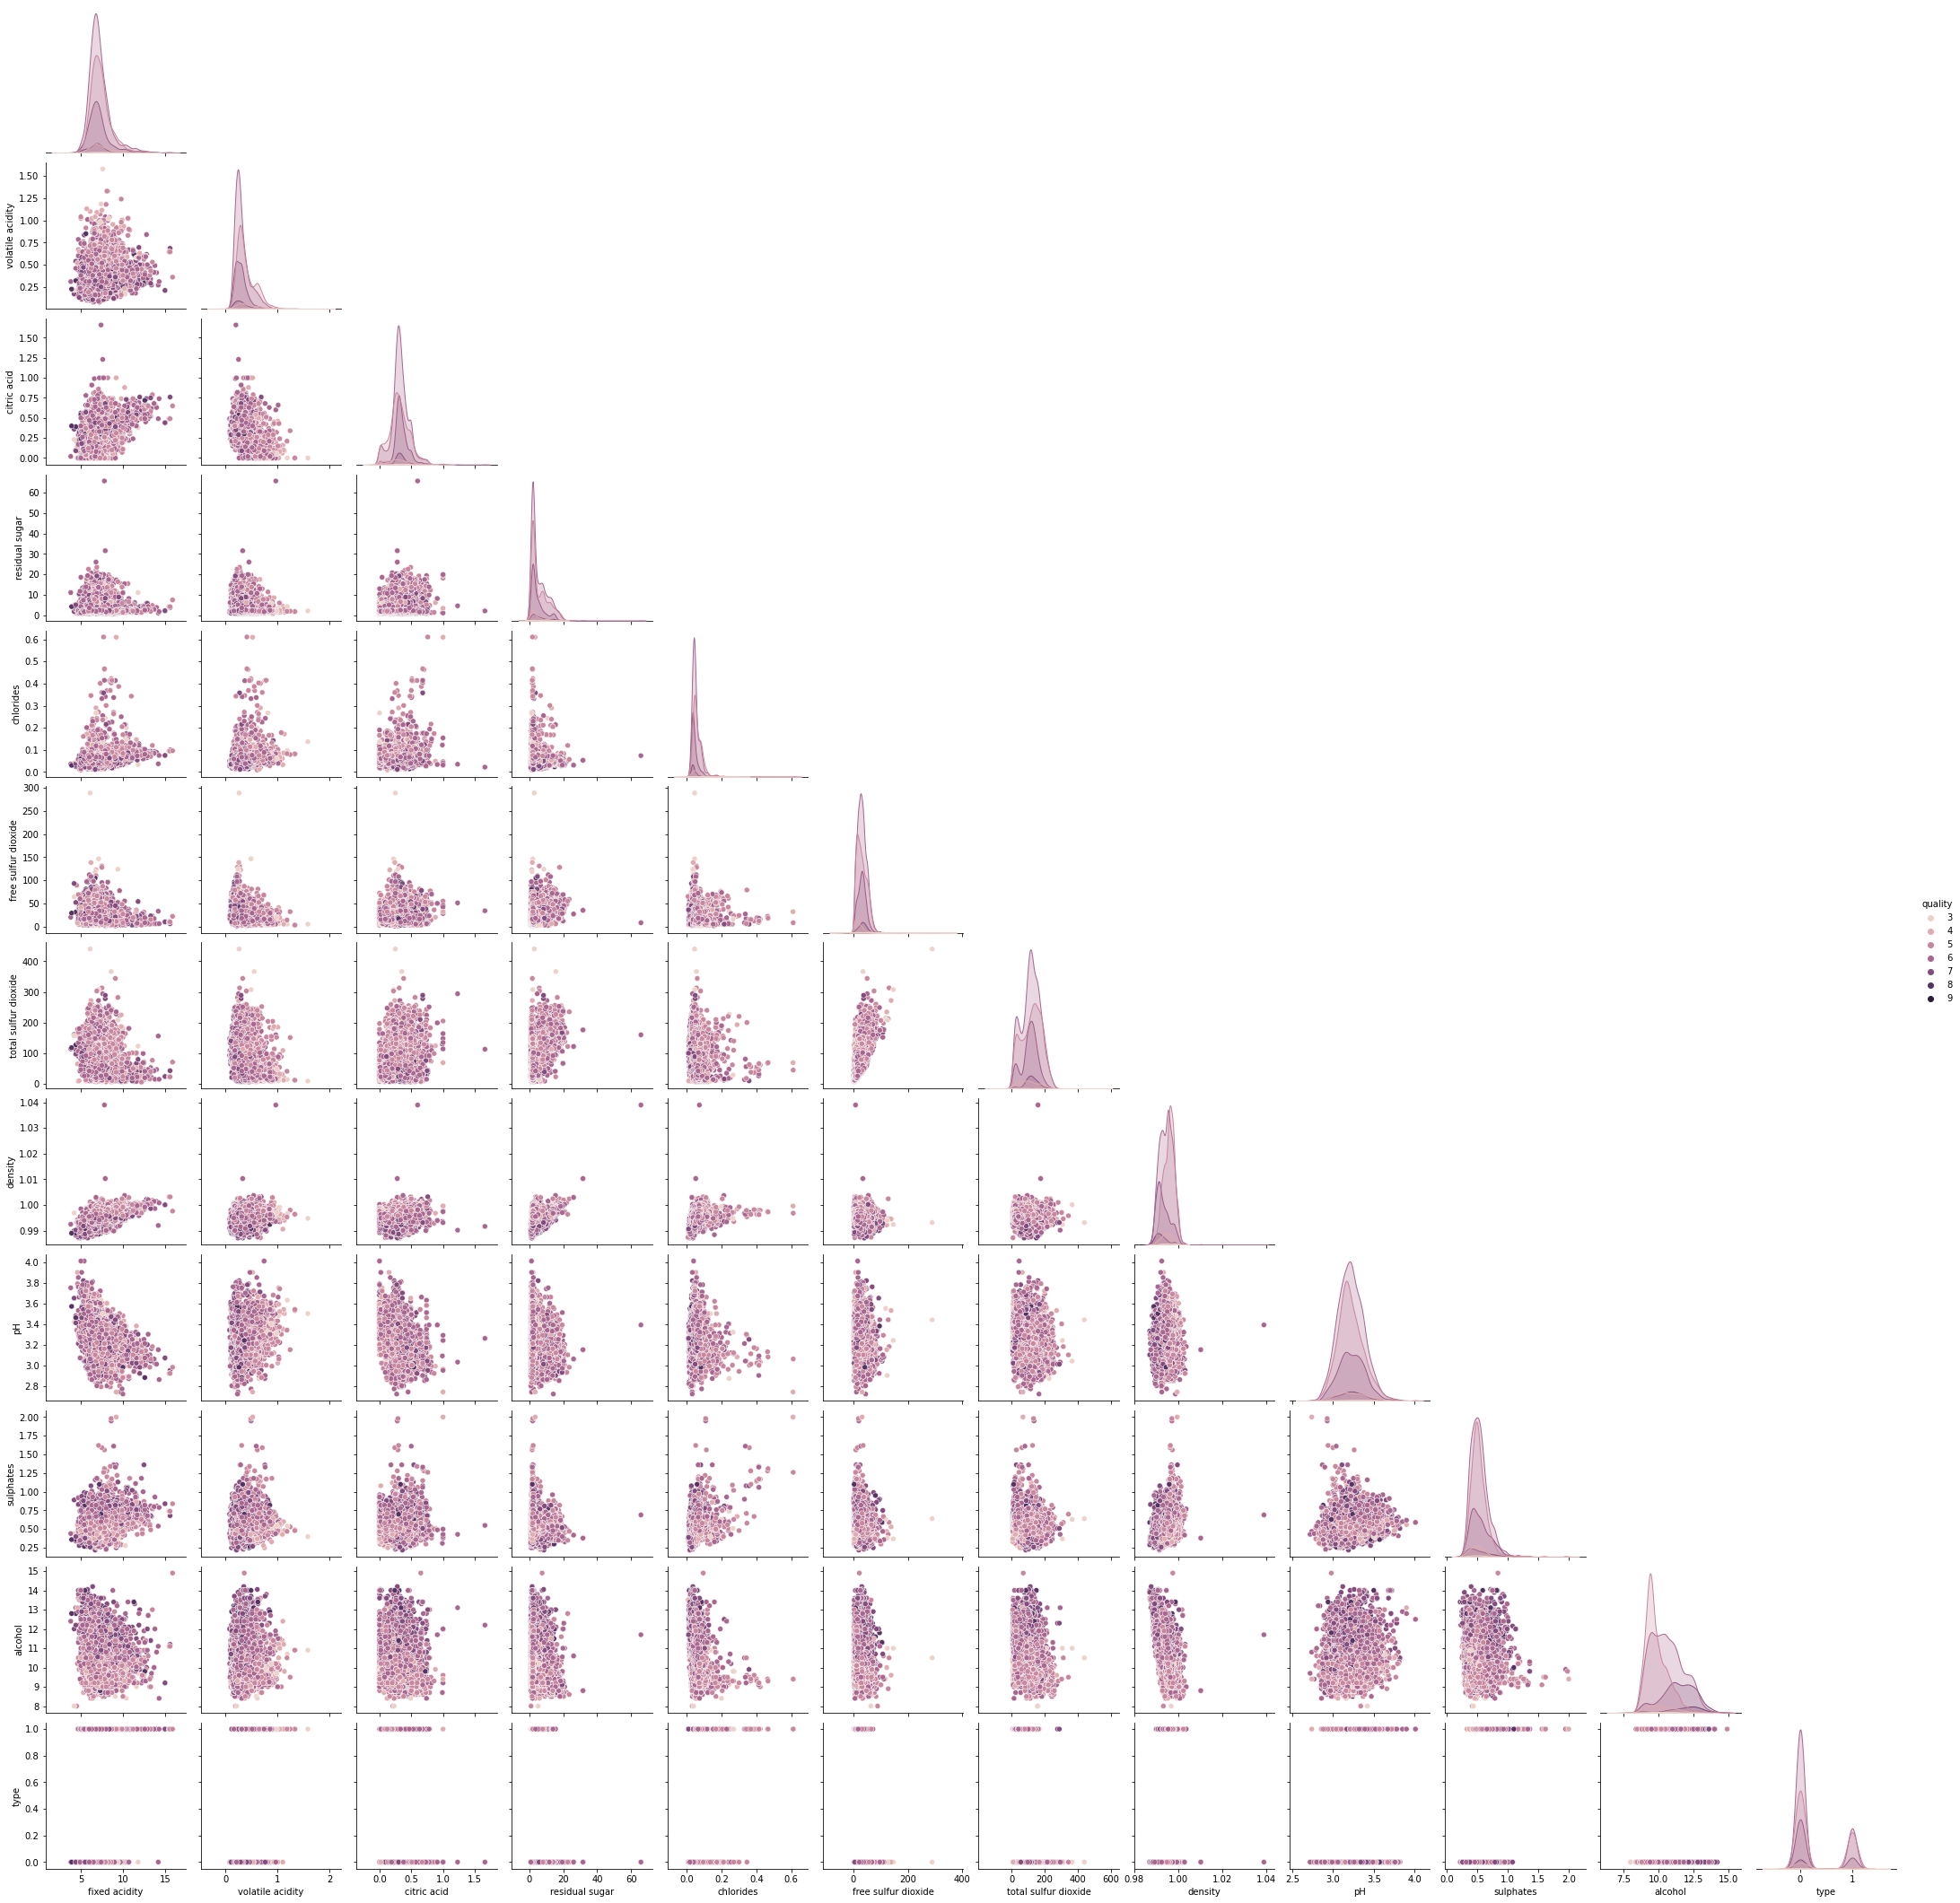

In [179]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(wine, hue='quality', corner=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

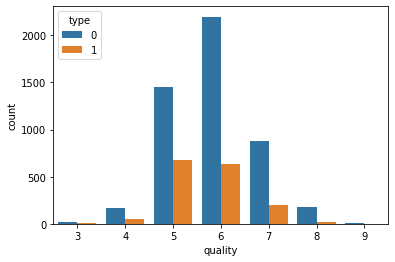

In [180]:
sns.countplot(x="quality", hue="type", data=wine)

<AxesSubplot:>

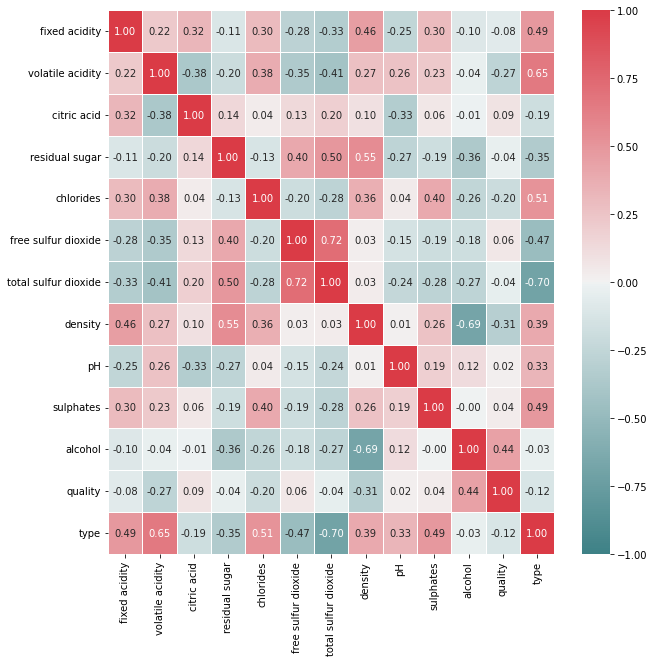

In [181]:
corr = wine.corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True), vmin=-1, vmax=1, linewidths=.5, fmt=".2f")

In [182]:
#Divied wine qualities into two dataset
wine["wine_quality"] = [1 if x>6 else 0 for x in wine.quality]
wine.head()

print()
y = wine["wine_quality"]
y.value_counts()

In [183]:
#Stroing Features in X
x = wine.drop(["quality", "wine_quality"], axis=1)
#Printing X
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [198]:
##MODEL TRAINING (DIFFERENT CLASSIFIERS)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log = pd.DataFrame(columns=["model", "accuracy"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 80)

In [199]:
# Logistic Regression
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_train, y_train)
score = accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
log = log.append({"model": "Logistic Regression", "accuracy": score}, ignore_index=True)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1036
           1       0.58      0.24      0.34       264

    accuracy                           0.81      1300
   macro avg       0.71      0.60      0.61      1300
weighted avg       0.78      0.81      0.78      1300



In [200]:
# C-support Vector Classification
from sklearn.svm import SVC
model = SVC(kernel="rbf", C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
log = log.append({"model": "SVC", "accuracy": score}, ignore_index=True)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1036
           1       0.00      0.00      0.00       264

    accuracy                           0.80      1300
   macro avg       0.40      0.50      0.44      1300
weighted avg       0.64      0.80      0.71      1300



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [201]:
# Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
log = log.append({"model": "Random Forest", "accuracy": score}, ignore_index=True)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1036
           1       0.79      0.57      0.66       264

    accuracy                           0.88      1300
   macro avg       0.84      0.77      0.80      1300
weighted avg       0.88      0.88      0.87      1300



In [202]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
log = log.append({"model": "Decision tree", "accuracy": score}, ignore_index=True)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1036
           1       0.64      0.67      0.65       264

    accuracy                           0.86      1300
   macro avg       0.78      0.79      0.78      1300
weighted avg       0.86      0.86      0.86      1300



In [203]:
# K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
log = log.append({"model": "K nearest neighbours", "accuracy": score}, ignore_index=True)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.50      0.39      0.44       264

    accuracy                           0.80      1300
   macro avg       0.68      0.65      0.66      1300
weighted avg       0.78      0.80      0.79      1300



In [204]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
log = log.append({"model": "GaussianNB", "accuracy": score}, ignore_index=True)

#Printing Table Comparision
print(log)

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1036
           1       0.40      0.65      0.49       264

    accuracy                           0.73      1300
   macro avg       0.65      0.70      0.66      1300
weighted avg       0.79      0.73      0.75      1300

                  model  accuracy
0   Logistic Regression  0.810769
1                   SVC  0.796923
2         Random Forest  0.881538
3         Decision tree  0.855385
4  K nearest neighbours  0.798462
5            GaussianNB  0.730000


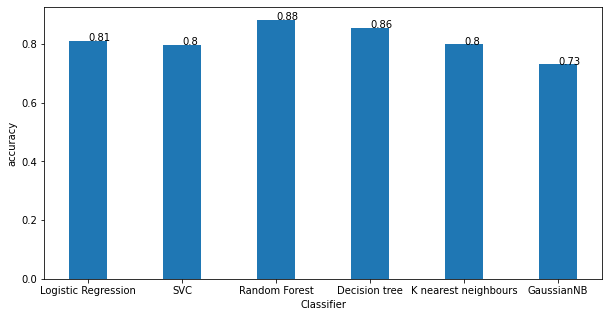

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(log["model"], log["accuracy"], width=0.4)
plt.xlabel("Classifier")
plt.ylabel("accuracy")
for index, value in enumerate(log["accuracy"]):
    plt.text(index,value, str(round(value, 2)))
plt.show()

In [206]:
## NEURAL NETWORK
#Hidden layers 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

white = pd.read_csv("./winequality-white.csv", sep =';')
red = pd.read_csv("./winequality-red.csv",  sep =';')

#change white to 0 and red to 1 
white['type'] = 0
red['type'] = 1

#put the white and red together 
wine = white.append(red, ignore_index = True)

#print(wine.tail())
x = wine.iloc[:, 0:11]
y = np.ravel(wine.type)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

nnModel = Sequential()
#first layer - input 
nnModel.add(Dense(12, activation ='relu', input_shape= (11, )))
nnModel.add(Dense(9, activation='sigmoid'))
nnModel.add(Dense(6, activation='relu'))
nnModel.add(Dense(3, activation='tanh'))
nnModel.add(Dense(1, activation='sigmoid'))

nnModel.summary()
nnModel.compile(loss='binary_crossentropy',optimizer='adam', metrics = ['accuracy'])

#fit the model w/10 epochs
nnModel.fit(x_train, y_train, epochs = 100, batch_size = 50, verbose = 1)
y_pred = nnModel.predict(x_test)
print()
print("Y Predicted:")
print(y_pred)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 12)                144       
                                                                 
 dense_36 (Dense)            (None, 9)                 117       
                                                                 
 dense_37 (Dense)            (None, 6)                 60        
                                                                 
 dense_38 (Dense)            (None, 3)                 21        
                                                                 
 dense_39 (Dense)            (None, 1)                 4         
                                                                 
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
104/104 [==============================] - 1

In [172]:
#linear Regression Model 
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

#find corr as each feature is a number 
corr = wine.corr()['quality'].drop('quality')

#shows the corr between different features and quality as target variable
print(corr)

#only take features with more than .05 
def get_features(correlation_threshold):
    abs_corrs = corr.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

features = get_features(0.05)
print(features)
X = wine[features]
Y = wine['quality']

#separate for training 
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=3)
print()

#Linear Regression 
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Regression Coef:", regressor.coef_)

print()
#train_pred
train_pred = regressor.predict(x_train)
print("Train Predicted:", train_pred)

test_pred=regressor.predict(x_test)
print("Test Predicted:", test_pred)
print()

#rmse for training and test should be similar
print("The MSE for training and test are similar:")
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print("Train_RMES:", train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print("Test_RMES:", test_rmse)

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
type                   -0.119323
Name: quality, dtype: float64
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol', 'type']

Regression Coef: [-2.43955756e-02 -1.73102179e+00 -1.22840755e-01 -6.00781452e-01
  3.47094318e-03  3.51074396e+01  3.85831286e-01  2.55665966e-01]

Train Predicted: [5.41703044 4.75357039 5.93426829 ... 6.54574833 5.83517646 5.46429296]
Test Predicted: [5.06923245 5.78411289 4.7903417  ... 6.02630731 5.34035257 5.38225477]

The MSE for training and test are similar:
Train_RMES: 0.7340715123106265
Test_RMES: 0.7681998173788328


In [173]:
## GRID SEARCH 

white = pd.read_csv("./winequality-white.csv", sep =';')
red = pd.read_csv("./winequality-red.csv",  sep =';')

wine = red.append(white, ignore_index = True)
wine['quality'] = [1 if i > 6.5 else 0 for i in wine['quality']]
print(wine)

wine['quality'].value_counts()
x = wine.iloc[:, :-1].values
y = wine.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'leaf_size': [10, 20, 30, 40, 50], 'metric': ['euclidean']},
              {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'leaf_size': [10, 20, 30, 40, 50], 'metric': ['manhattan']},
              {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'leaf_size': [10, 20, 30, 40, 50], 'metric': ['chebyshev']},
              {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'leaf_size': [10, 20, 30, 40, 50], 'p': [1, 2], 'metric': ['minkowski']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  